In [10]:
#KNN Classifier - Breast Cancer
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

In [11]:
breast_cancer = pd.read_csv("Breast_Cancer_Wisconsin.csv")
print(breast_cancer.head(5))

   ID_Number  Clump_Thickness  Unit_Cell_Size  Unit_Cell_Shape  Marg_Adhesion  \
0    1000025                5               1                1              1   
1    1002945                5               4                4              5   
2    1015425                3               1                1              1   
3    1016277                6               8                8              1   
4    1017023                4               1                1              3   

   Single_Epth_Cell_Size Bare_Nuclei  Bland_Chromatin  Normal_Nucleoli  \
0                      2           1                3                1   
1                      7          10                3                2   
2                      2           2                3                1   
3                      3           4                3                7   
4                      2           1                3                1   

   Mitoses  Class  
0        1      2  
1        1      2  
2       

The following are the first few rows to show how the data looks like. The Class value has
class 2 and 4. Value 2 and 4 represent benign and malignant class, respectively. Whereas all
the other variables do vary between value 1 and 10, which are very much categorical in
nature. Only the Bare_Nuclei variable has some missing values, here we are replacing them with
the most frequent value (category value 1) in the following code

In [12]:
breast_cancer["Bare_Nuclei"] = breast_cancer["Bare_Nuclei"].replace('?',np.NAN)
breast_cancer["Bare_Nuclei"] = breast_cancer.fillna(breast_cancer["Bare_Nuclei"].value_counts().index[0])

In [13]:
breast_cancer['Cancer_Ind'] = 0
breast_cancer.loc[breast_cancer['Class']==4, 'Cancer_Ind'] = 1

In [18]:
x_vars = breast_cancer.drop(['ID_Number','Class','Cancer_Ind'],axis = 1)
y_vars = breast_cancer['Cancer_Ind']

In [19]:
from sklearn.preprocessing import StandardScaler
x_vars_stdscle = StandardScaler().fit_transform(x_vars.values)
from sklearn.model_selection import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [22]:
x_vars_stdscle = pd.DataFrame(x_vars_stdscle, index= x_vars.index, columns= x_vars.columns)
x_train,x_test,y_train,y_test = train_test_split(x_vars_stdscle,y_vars,train_size=0.7,random_state=42)

In [23]:
from sklearn.neighbors import KNeighborsClassifier 
knn_fit = KNeighborsClassifier(n_neighbors=3, p=2,metric='minkowski')
knn_fit.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [24]:
print("\nK-Nearest Neighbors - Train Confusion Matrix\n\n",
       pd.crosstab(y_train, knn_fit.predict(x_train),rownames =["Actuall"],colnames = ["Predicted"]) )
print("\nK-Nearest Neighbors - Train accuracy:",round(accuracy_score(y_train, knn_fit.predict(x_train)),3))
print("\nK-Nearest Neighbors - Train Classification Report\n", classification_report( y_train,knn_fit.predict(x_train)))
print("\n\nK-Nearest Neighbors - Test Confusion Matrix\n\n",
       pd.crosstab(y_test, knn_fit.predict(x_test),rownames =["Actuall"],colnames = ["Predicted"]))
print("\nK-Nearest Neighbors - Test accuracy:",round(accuracy_score(y_test,knn_fit.predict(x_test)),3))
print("\nK-Nearest Neighbors - Test Classification Report\n",classification_report(y_test,knn_fit.predict(x_test)))


K-Nearest Neighbors - Train Confusion Matrix

 Predicted    0    1
Actuall            
0          303   12
1            3  171

K-Nearest Neighbors - Train accuracy: 0.969

K-Nearest Neighbors - Train Classification Report
              precision    recall  f1-score   support

          0       0.99      0.96      0.98       315
          1       0.93      0.98      0.96       174

avg / total       0.97      0.97      0.97       489



K-Nearest Neighbors - Test Confusion Matrix

 Predicted    0   1
Actuall           
0          139   4
1            2  65

K-Nearest Neighbors - Test accuracy: 0.971

K-Nearest Neighbors - Test Classification Report
              precision    recall  f1-score   support

          0       0.99      0.97      0.98       143
          1       0.94      0.97      0.96        67

avg / total       0.97      0.97      0.97       210



From the results, it is appearing that KNN is working very well in classifying malignant
and benign classes well, obtaining test accuracy of 97.6 percent with 96 percent of recall on
malignant class. The only deficiency of KNN classifier would be, it is computationally
intensive during test phase, as each test observation will be compared with all the available
observations in train data, which practically KNN does not learn a thing from training data.
Hence, we are also calling it a lazy classifier!

# #Tuning of k-value in KNN classifier

In [25]:
#Tuning of K-value for Train & Test data
dummyarray=np.empty((5,3))
k_valchart = pd.DataFrame(dummyarray)
k_valchart.columns = ["K_value","Train_acc","Test_acc"]

In [26]:
k_vals = [1,2,3,4,5]

In [28]:
for i in range(len(k_vals)):
    knn_fit = KNeighborsClassifier(n_neighbors=k_vals[i],p=2,metric='minkowski')
    knn_fit.fit(x_train,y_train)
    print("\nK-value",k_vals[i])
    tr_accscore = round(accuracy_score(y_train,knn_fit.predict(x_train)),3)
    print("\nK-Nearest Neighbors - Train Confusion Matrix\n\n",
           pd.crosstab( y_train, knn_fit.predict(x_train),rownames =["Actuall"],colnames = ["Predicted"]) )
    print("\nK-Nearest Neighbors - Train accuracy:",tr_accscore)
    print ("\nK-Nearest Neighbors - Train Classification Report\n",
           classification_report(y_train,knn_fit.predict(x_train)))
    ts_accscore= round(accuracy_score(y_test,knn_fit.predict(x_test)),3)
    print ("\n\nK-Nearest Neighbors - Test Confusion Matrix\n\n",
           pd.crosstab( y_test,knn_fit.predict(x_test),rownames =["Actuall"],colnames = ["Predicted"]))
    print ("\nK-Nearest Neighbors - Test accuracy:",ts_accscore)
    print ("\nK-Nearest Neighbors - Test Classification Report\n",classification_report(y_test,knn_fit.predict(x_test)))
    k_valchart.loc[i, 'K_value'] = k_vals[i]
    k_valchart.loc[i, 'Train_acc'] = tr_accscore
    k_valchart.loc[i, 'Test_acc'] = ts_accscore


K-value 1

K-Nearest Neighbors - Train Confusion Matrix

 Predicted    0    1
Actuall            
0          315    0
1            0  174

K-Nearest Neighbors - Train accuracy: 1.0

K-Nearest Neighbors - Train Classification Report
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       315
          1       1.00      1.00      1.00       174

avg / total       1.00      1.00      1.00       489



K-Nearest Neighbors - Test Confusion Matrix

 Predicted    0   1
Actuall           
0          140   3
1            9  58

K-Nearest Neighbors - Test accuracy: 0.943

K-Nearest Neighbors - Test Classification Report
              precision    recall  f1-score   support

          0       0.94      0.98      0.96       143
          1       0.95      0.87      0.91        67

avg / total       0.94      0.94      0.94       210


K-value 2

K-Nearest Neighbors - Train Confusion Matrix

 Predicted    0    1
Actuall            
0          315    

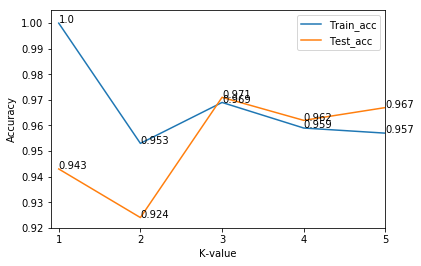

In [29]:
# Ploting accuracies over varied K-values
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.plot(k_valchart["K_value"],k_valchart["Train_acc"])
plt.plot(k_valchart["K_value"],k_valchart["Test_acc"])
plt.axis([0.9,5, 0.92, 1.005])
plt.xticks([1,2,3,4,5])
for a,b in zip(k_valchart["K_value"],k_valchart["Train_acc"]):
    plt.text(a, b, str(b),fontsize=10)
for a,b in zip(k_valchart["K_value"],k_valchart["Test_acc"]):
    plt.text(a, b, str(b),fontsize=10)
plt.legend(loc='upper right')
plt.show()